In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib agg

import jax
import jax.numpy as jnp
import visualization
from utils import results, experiments, settings

In [2]:
result = results.ResultSample.load_from_file(
    file_name="/home/gw/data/experiments/master_thesis/results/bd5a1e9c17b4a149e37bef8d54e2d196.tar.gz",
    #file_name="/home/gw/data/experiments/master_thesis/results/1ad5038db1cd040f3d50d7ab34de72da.tar.gz",
)
experiment = experiments.FactoryExperiment(result.experiment_type, **{"settings": result.settings})()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [00:02<00:00, 85.75it/s]


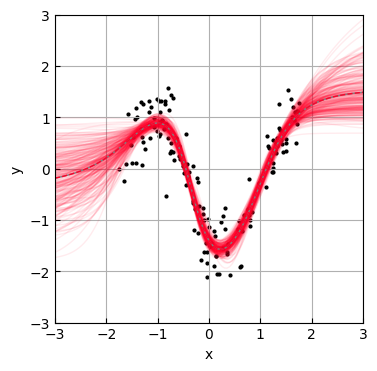

In [3]:
rng_key, rng_key_ = jax.random.split(jax.random.PRNGKey(0))
samples_parameters_fs = jax.random.permutation(rng_key_, result.samples["parameters"])

figure = visualization.RegressionFigure(
    settings=settings.SettingsRegressionFigure(
        settings_plot=settings.SettingsPlot(
            alpha=0.08,
            epistemic=False
        )
    )
)
figure.plot(
    dataset=experiment._dataset,
    transformation=experiment._model_transformation.apply_from_vector,
    parameters_list=[samples_parameters_fs[:2**10]],
    std=result.samples["std"].mean()
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.24it/s]


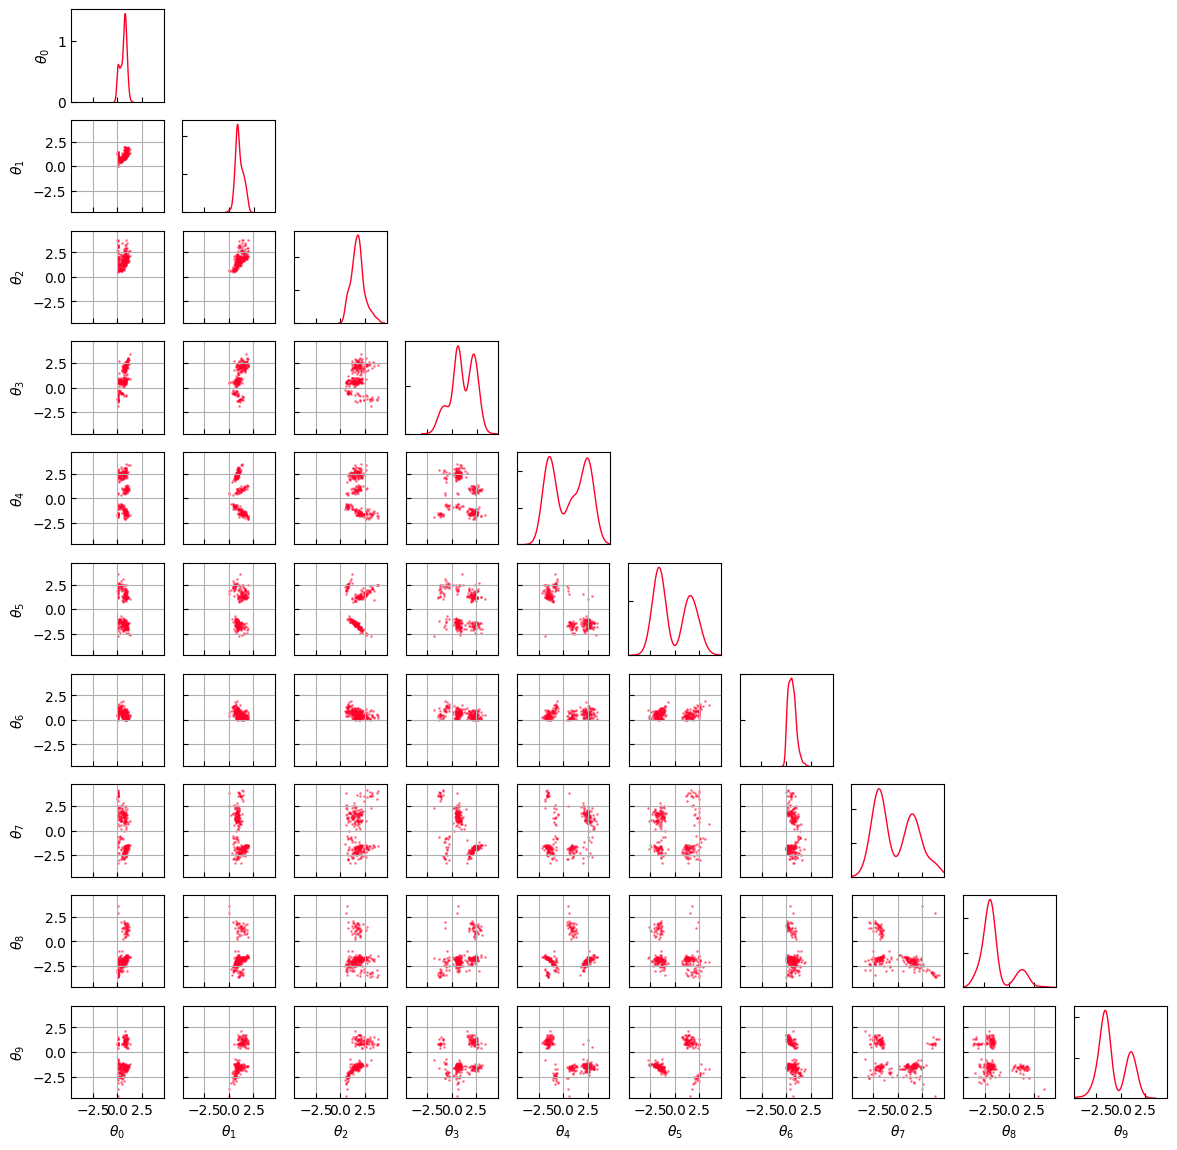

In [4]:
rng_key, rng_key_ = jax.random.split(rng_key)
samples_parameters_posterior = samples_parameters_fs
if samples_parameters_posterior.shape[-1] > 10:
    samples_parameters_posterior = samples_parameters_posterior[:, jax.random.permutation(rng_key_, jnp.arange(samples_parameters_fs.shape[-1]))[:10]]

figure = visualization.TriangleFigure(
    settings=settings.SettingsTriangleFigure(
        prefix=r"\theta",
        settings_scatter=settings.SettingsScatter(
            alpha=0.4,
            size=1.0
        )
    )
)
figure.plot(
    data_list=[samples_parameters_posterior]
)